In [ ]:
!pip install -q kaggle

In [ ]:
# Go to your Kaggle account and navigate to your account settings (click on your profile picture -> "Account").
# Scroll down to the "API" section and click "Create New API Token." This will download a kaggle.json file containing your API key.
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amritpreetsingh0915","key":"32222ffee54125dcbc4cd15753128fee"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d priyamchoksi/1-million-reddit-jokes-rjokes

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/1-million-reddit-jokes-rjokes
License(s): Attribution 4.0 International (CC BY 4.0)
 96% 89.0M/92.9M [00:03<00:00, 28.6MB/s]
100% 92.9M/92.9M [00:03<00:00, 25.3MB/s]


In [ ]:
!unzip 1-million-reddit-jokes-rjokes.zip

Archive:  1-million-reddit-jokes-rjokes.zip
  inflating: one-million-reddit-jokes.csv  


In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

In [2]:
### TODO: Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

In [ ]:
pip install transformers pandas

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load the model and tokenizer
model_name = "michellejieli/NSFW_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv("one-million-reddit-jokes.csv")


In [ ]:
df = df[["selftext", "title"]]
df = df[~df['title'].isin(["[deleted]", "[removed]"]) & ~df['selftext'].isin(["[deleted]", "[removed]"])]
df = df.drop_duplicates(subset='title', keep='first')
df = df.reset_index(drop=True)

In [ ]:
df.head(20)

,selftext,title
0,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!
1,It's called Google Sheets.,Did you know Google now has a platform for rec...
2,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...
3,Oo..lala...,What did the French man say to the attractive ...
4,"Yo momma's so fat, that when she went to the z...",Yo Mama
5,Because to refuel it needed to be stationery.,"Why did the pilot turn his plane into pens, pe..."
6,I was happy to meat her.,On my 18th birthday my friend introduced me to...
7,“Gummy” bears,Which animal has the softest bite?
8,"Because nothing is funny any more, April Fools...",April Fool.....
9,You are.,Want to know which user is gullible? Click her...


In [ ]:
df['jokes'] = df['title'] + " " + df['selftext']
df = df[['jokes']]

In [ ]:
df.head(20)

,jokes
0,I am soooo glad I'm not circumcised! My corona...
1,Did you know Google now has a platform for rec...
2,What is the difference between my wife and my ...
3,What did the French man say to the attractive ...
4,"Yo Mama Yo momma's so fat, that when she went ..."
5,"Why did the pilot turn his plane into pens, pe..."
6,On my 18th birthday my friend introduced me to...
7,Which animal has the softest bite? “Gummy” bears
8,April Fool..... Because nothing is funny any m...
9,Want to know which user is gullible? Click her...


In [ ]:
df = df.dropna(subset=['Joke'])
df['Joke'] = df['Joke'].astype(str)

In [ ]:
sampled_df = df.sample(n=20000, random_state=42).reset_index(drop=True)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax

def classify_jokes(jokes):
    classifications = []
    for joke in jokes:
        inputs = tokenizer(joke, return_tensors="pt", truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=-1)
        pred_class = torch.argmax(probs).item()
        classifications.append("NSFW" if pred_class == 1 else "SFW")
    return classifications

sampled_df['classification'] = classify_jokes(sampled_df['Joke'])

In [ ]:
sfw = sample_df[sample_df['Classification'] == "SFW"]
nsfw = sample_df[sample_df['Classification'] == "NSFW"]
sfw_sample_df = sfw.sample(n=100, random_state=42).reset_index(drop=True)
nsfw_sample_df = nsfw.sample(n=100, random_state=42).reset_index(drop=True)

In [ ]:
output_file = "sfwsample.csv"  # Specify the output file name
sfw_sample_df.to_csv(output_file, index=False)
output_file = "nfwsample.csv"  # Specify the output file name
nsfw_sample_df.to_csv(output_file, index=False)

In [ ]:
sfwtest = pd.read_csv("sfwsample.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = sfwtest[['Classification', 'Human', 'ChatGPT']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

sfwtest= sfwtest[['Classification', 'Human', 'ChatGPT']]


      Classification   Human ChatGPT
NSFW           0.00%  16.00%   6.00%
SFW          100.00%  84.00%  94.00%
Total           100%    100%    100%


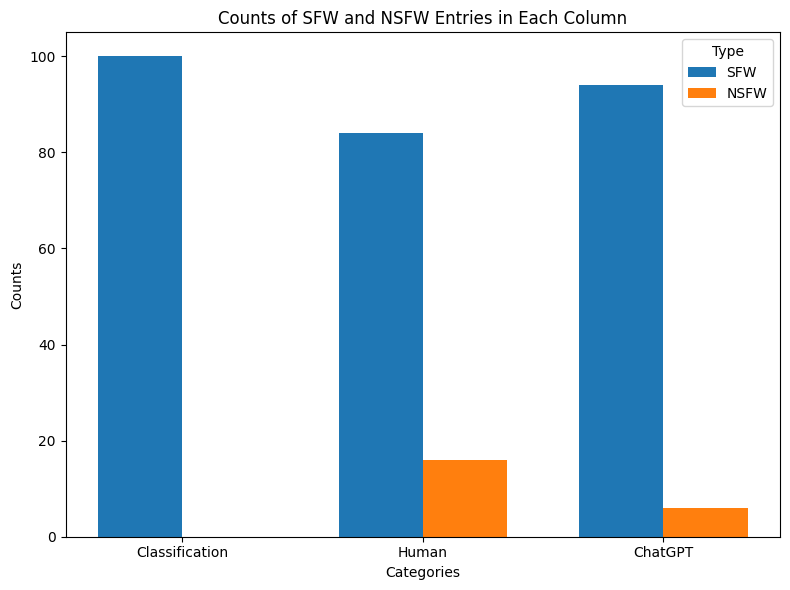

In [ ]:
counts = sfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
nsfwtest = pd.read_csv("nfwsample.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = nsfwtest[['Classification', 'Human', 'ChatGPT']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

nsfwtest= nsfwtest[['Classification', 'Human', 'ChatGPT']]

      Classification   Human ChatGPT
NSFW         100.00%  93.00%  97.00%
SFW            0.00%   7.00%   3.00%
Total           100%    100%    100%


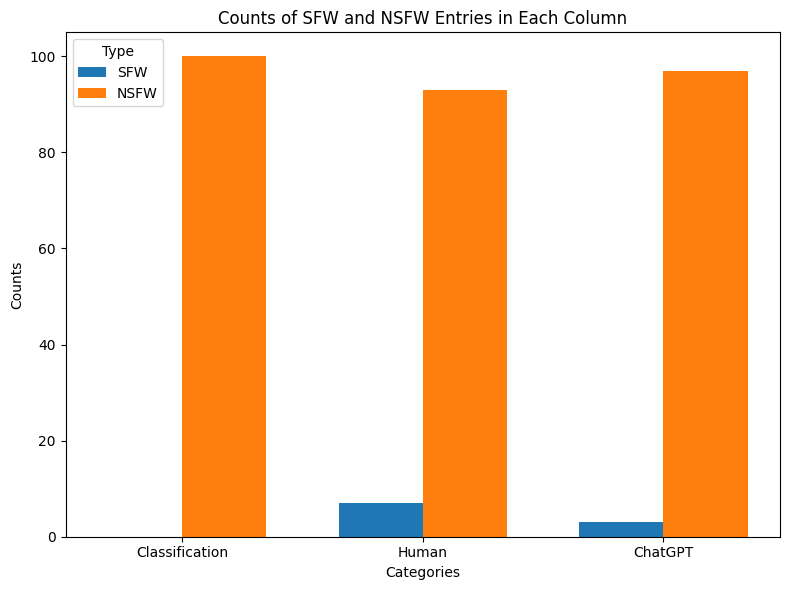

In [ ]:
counts = nsfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
sample_df = pd.read_csv("chatgptfromscratch.csv")
sfw = sample_df[sample_df['Classification'] == "SFW"]
nsfw = sample_df[sample_df['Classification'] == "NSFW"]
sfw_sample_df = sfw.sample(n=100, random_state=42).reset_index(drop=True)
nsfw_sample_df = nsfw.sample(n=100, random_state=42).reset_index(drop=True)

In [ ]:
output_file = "sfwsamplegpt.csv"  # Specify the output file name
sfw_sample_df.to_csv(output_file, index=False)
output_file = "nfwsamplegpt.csv"  # Specify the output file name
nsfw_sample_df.to_csv(output_file, index=False)

In [ ]:
sfwtest = pd.read_csv("sfwsamplegpt.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = sfwtest[['Classification', 'Human', 'Annotator']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

sfwtest= sfwtest[['Classification', 'Human', 'Annotator']]

      Classification   Human Annotator
NSFW           0.00%   4.00%     2.00%
SFW          100.00%  96.00%    98.00%
Total           100%    100%      100%


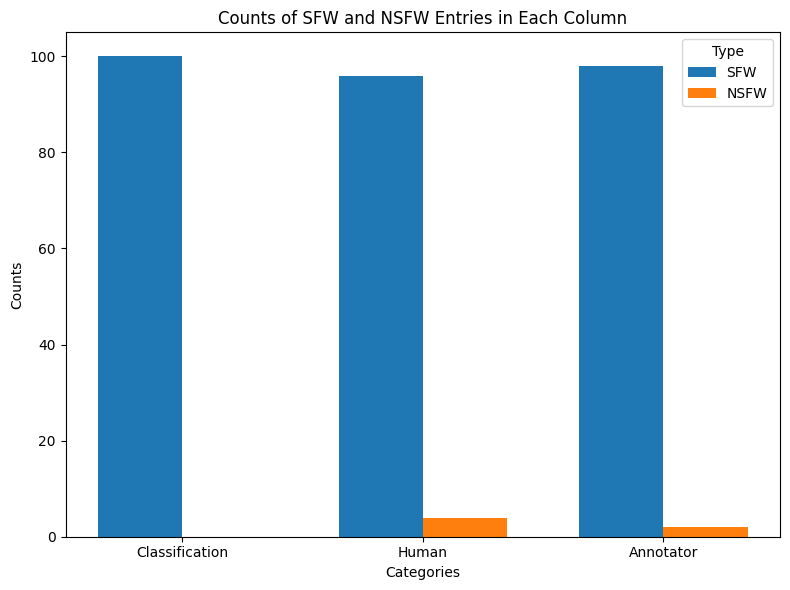

In [ ]:
counts = sfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
nsfwtest = pd.read_csv("nfwsamplegpt.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = nsfwtest[['Classification', 'Human', 'Annotator']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

nsfwtest= nsfwtest[['Classification', 'Human', 'Annotator']]

      Classification   Human Annotator
NSFW         100.00%  94.00%    98.00%
SFW            0.00%   6.00%     2.00%
Total           100%    100%      100%


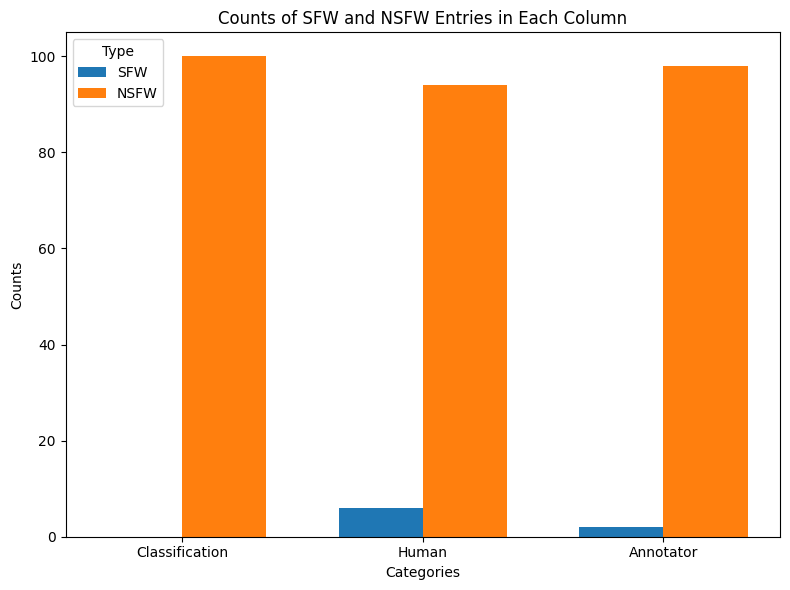

In [ ]:
counts = nsfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
sfwtest = pd.read_csv("sfwsamplegpt.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = sfwtest[['Classification', 'Human', 'Annotator']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

sfwtest= sfwtest[['Classification', 'Human', 'Annotator']]

      Classification   Human Annotator
NSFW           0.00%   2.00%     1.00%
SFW          100.00%  98.00%    99.00%
Total           100%    100%      100%


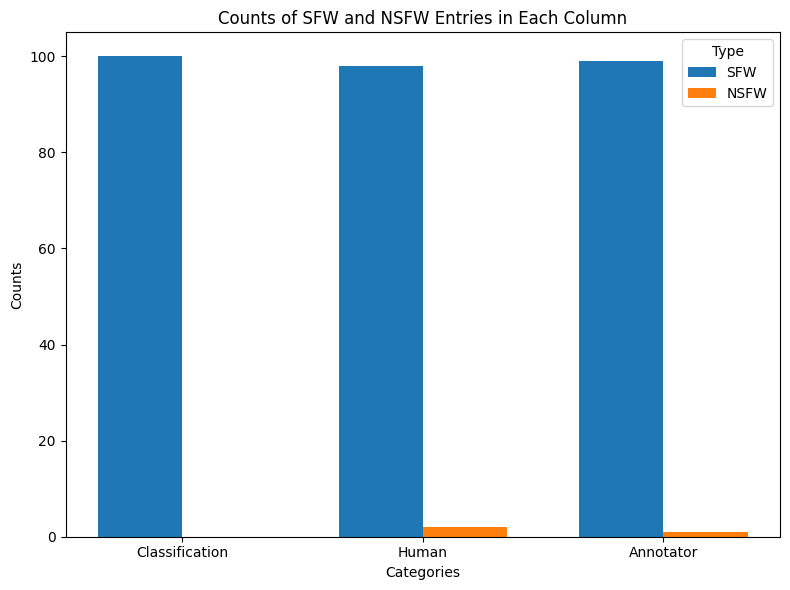

In [4]:
counts = sfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
nsfwtest = pd.read_csv("nfwsamplegpt.csv")
counts = {'NSFW': {}, 'SFW': {}}
df_selected = nsfwtest[['Classification', 'Human', 'Annotator']]

total_counts = df_selected.count()
for col in df_selected.columns:
    counts['NSFW'][col] = (df_selected[col] == 'NSFW').sum()
    counts['SFW'][col] = (df_selected[col] == 'SFW').sum()
    # Calculate the percentage for each category
    counts['NSFW'][col] = f"{counts['NSFW'][col] / total_counts[col] * 100:.2f}%"
    counts['SFW'][col] = f"{counts['SFW'][col] / total_counts[col] * 100:.2f}%"

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).transpose().fillna(0)

# Add a total row
df_counts.loc['Total'] = "100%"

# Print the DataFrame
print(df_counts)

nsfwtest= nsfwtest[['Classification', 'Human', 'Annotator']]

      Classification   Human Annotator
NSFW         100.00%  97.00%    98.00%
SFW            0.00%   3.00%     2.00%
Total           100%    100%      100%


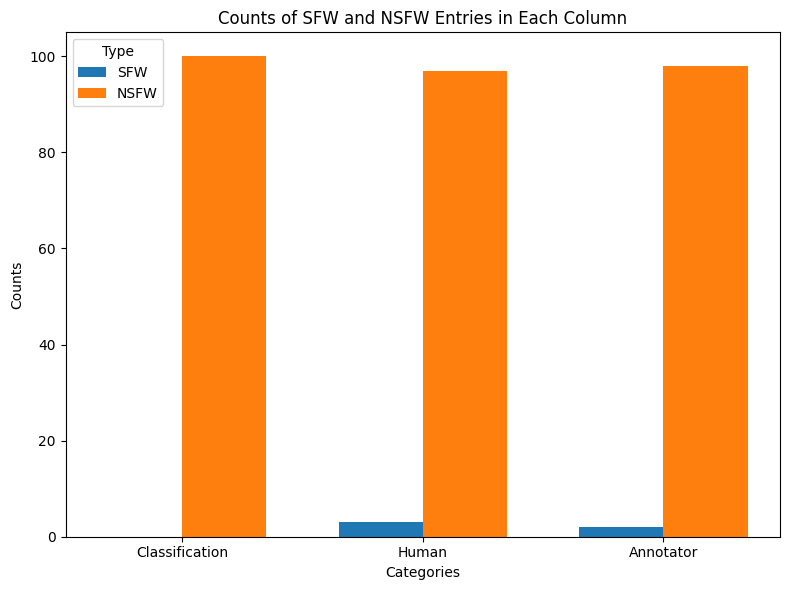

In [6]:
counts = nsfwtest.apply(pd.Series.value_counts).fillna(0).astype(int)

# Creating the required bar graph
fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(counts.columns))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting SFW and NSFW bars
ax.bar([pos - width / 2 for pos in x], counts.loc["SFW"], width, label='SFW')
ax.bar([pos + width / 2 for pos in x], counts.loc["NSFW"], width, label='NSFW')

# Adding labels and title
ax.set_title("Counts of SFW and NSFW Entries in Each Column")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
ax.set_xticks(x)
ax.set_xticklabels(counts.columns)
ax.legend(title="Type")
plt.tight_layout()

# Show the plot
plt.show()